In [ ]:
!nvidia-smi

Wed Jan 19 19:56:55 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [ ]:
import torch
torch.__version__

'1.10.0+cu111'

In [ ]:
! [ -e /content ] && pip install -Uqq fastai 

     |████████████████████████████████| 189 kB 5.4 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 


In [ ]:
import fastai
fastai.__version__

'2.5.3'

In [ ]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import *

In [ ]:
!pip install -i https://test.pypi.org/simple/ supportlib
import supportlib.gettingdata as getdata
getdata.kaggle()
!kaggle datasets download -d alxmamaev/flowers-recognition

Looking in indexes: https://test.pypi.org/simple/


Saving kaggle.json to kaggle (1).json
flowers-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
getdata.zipextract('/content/flowers-recognition.zip')

In [ ]:
files = get_image_files("/content/flowers")
len(files)

4317

In [ ]:
files[0],files[6]

(Path('/content/flowers/rose/18490508225_0fc630e963_n.jpg'),
 Path('/content/flowers/rose/3621011057_0d03bd171b_n.jpg'))

In [ ]:
def label_func(f): return f[0].isupper()

In [ ]:
dls = ImageDataLoaders.from_name_func('/content/flowers', files, label_func, item_tfms=Resize(224))

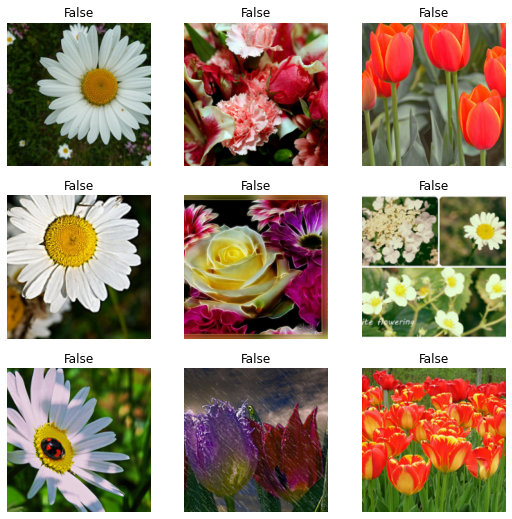

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate,accuracy])
learn.summary()

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

In [ ]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.000000,0.000000,0.000000,1.000000,00:34


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.000000,0.000000,0.000000,1.000000,00:42


In [ ]:
learn.predict(files[0])

('False', TensorBase(0), TensorBase([1.]))

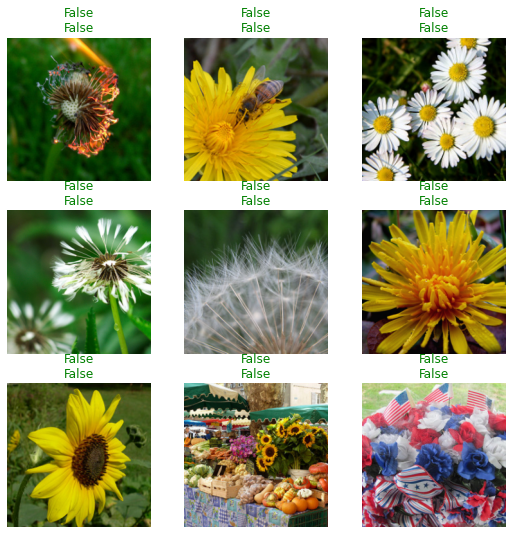

In [ ]:
learn.show_results()

In [ ]:
interp = Interpretation.from_learner(learn)

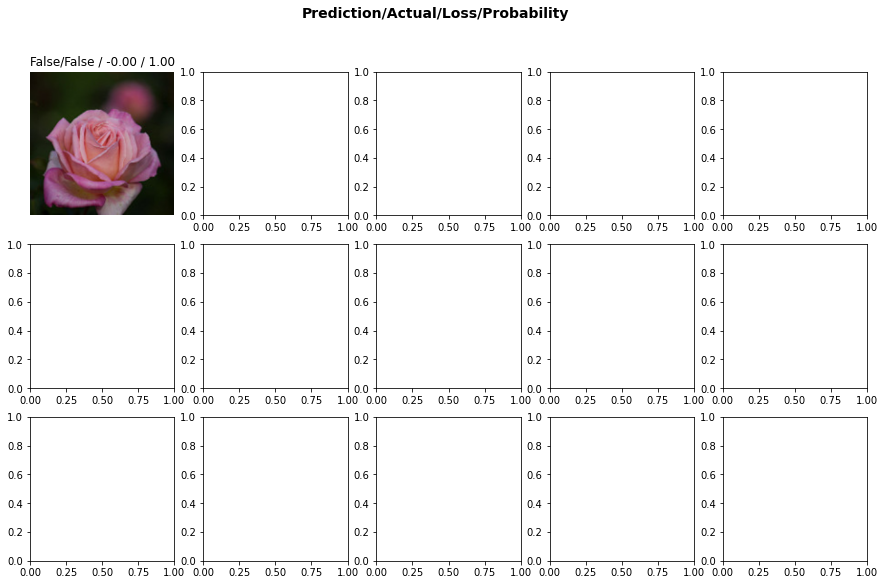

In [ ]:
interp.plot_top_losses(k=15)

SuggestedLRs(valley=6.309573450380412e-07)

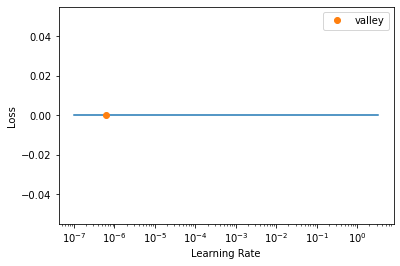

In [ ]:
learn.lr_find()

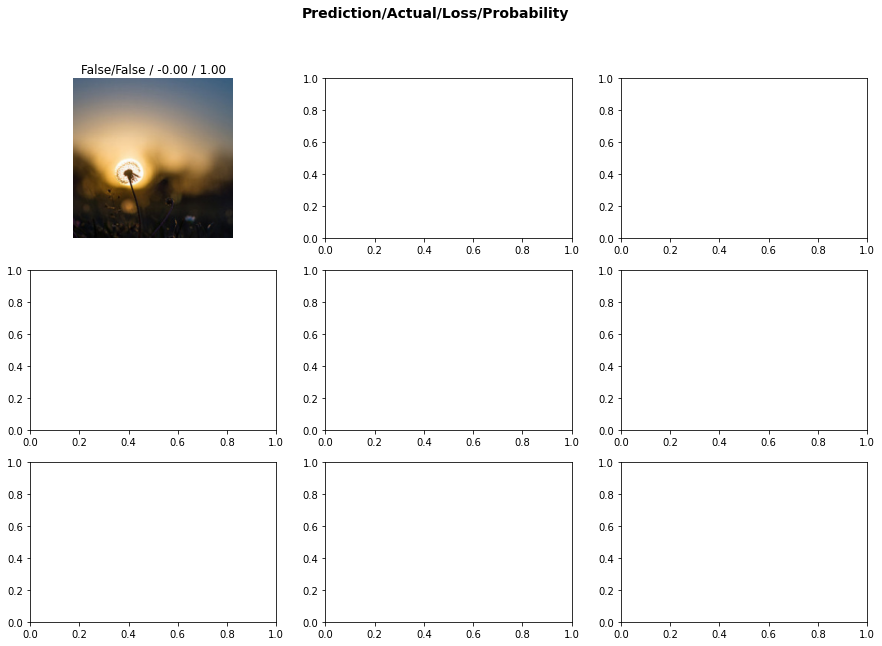

In [ ]:
interp.plot_top_losses(9, figsize=(15,10))